# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

#Setting the cryptocurrency identifier for easier use later
btc_identity = str(1)
eth_identity = str(1027)

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD" #These were set to convert to Canadian, I set them to USD
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json() #pull from the API
btc_price = btc_response['data'][btc_identity]['quotes']['USD']['price'] #Reference the price from the .json
# Fetch current ETH price
eth_response = requests.get(eth_url).json() #pull from the API
eth_price = eth_response['data'][eth_identity]['quotes']['USD']['price'] #Reference the price from the .json
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_coin_value = my_btc_value + my_eth_value #total value to be used later
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $21413.66
The current value of your 5.3 ETH is $2521.85


In [6]:
#Using this cell to inspect btc_response and eth_response
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 113479238,
   'total_supply': 113479238,
   'max_supply': 0,
   'quotes': {'USD': {'price': 475.82,
     'volume_24h': 14674601093,
     'market_cap': 53926733355,
     'percentage_change_1h': 0.59541191253435,
     'percentage_change_24h': -0.711830290867992,
     'percentage_change_7d': 5.78135180031683,
     'percent_change_1h': 0.59541191253435,
     'percent_change_24h': -0.711830290867992,
     'percent_change_7d': 5.78135180031683}},
   'last_updated': 1605720506}},
 'metadata': {'timestamp': 1605720506,
  'num_cryptocurrencies': 1417,
  'error': None}}

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [9]:
# Format current date as ISO format
todays_date = datetime.now() #pulls the current datetime for the most up to date analysis
today = pd.Timestamp(todays_date, tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# Get current closing prices for SPY and AGG
invest_df = alpaca.get_barset(tickers, timeframe, start = today).df

# Preview DataFrame
invest_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-11-18 00:00:00-05:00  117.95  117.98  117.92  117.98  2623206  360.91   

                                                            
                            high     low   close    volume  
2020-11-18 00:00:00-05:00  361.5  360.31  361.11  17641043

In [10]:
# Pick AGG and SPY close prices
agg_close_price = round(invest_df['AGG']['close'][0] , 2)
spy_close_price = round(invest_df['SPY']['close'][0], 2)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.98
Current SPY closing price: $361.11


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
my_total_shares_value = my_spy_value + my_agg_value #total value to be used later

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18055.50
The current value of your 200 AGG shares is $23596.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
df_savings = pd.DataFrame([my_coin_value , my_total_shares_value], columns = ['amount'] , index = ['crypto' , 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,23935.51
shares,41651.50


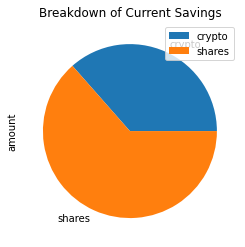

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount' , title = 'Breakdown of Current Savings')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_coin_value + my_total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations, you have enough money in this fund!')
elif total_savings == emergency_fund:
    print('Congratulations, you have reached your financial goal of having exactly enough money in your savings fund!')
else:
    print(f'You are ${round((emergency_fund - total_savings),2)} away from reaching your goal.')

Congratulations, you have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp(todays_date, tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.tail()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-11-12 00:00:00-05:00  117.37  117.63  117.33  117.62  7438935  355.58   
2020-11-13 00:00:00-05:00  117.52  117.69  117.52  117.60  2832393  355.27   
2020-11-16 00:00:00-05:00  117.61  117.67  117.58  117.64  5501903  360.98   
2020-11-17 00:00:00-05:00  117.75  117.90  117.75  117.87  3701335  359.97   
2020-11-18 00:00:00-05:00  117.95  117.98  117.92  117.98  2623206  360.91   

                                                               
                               high     low   close    volume  
2020-11-12 00:00:00-05:00  356.7182  351.26  353.28  57393573  
2020-11-13 00:00:00-05:00  357.8100  354.71  357.33  34319763  
2020-11-16 00:00:00-05:00  362.4900  359.59  362.43  55926517  
2020-11-17 00:00:00-05:00  361.9200  358.34  360.64  54021793  
2020-11-18 00:00:00-05:00  361.5000  360.31  361.11  17641043

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000021,1.004005,1.002816,0.999237,1.005483,0.989964,1.005848,1.002249,0.998909,1.005266,...,0.994140,0.995349,0.996194,0.998792,0.991019,1.004661,1.007715,0.994726,0.987405,0.983847
2,1.000777,0.998426,0.997663,1.002478,0.995215,0.980926,0.993731,1.001554,1.006035,0.996349,...,0.998051,0.990376,1.003633,1.001280,0.997420,0.993759,1.002352,1.010082,0.985495,0.985242
3,0.998050,0.998488,0.987516,1.008216,0.997006,0.991198,0.997406,0.999512,1.002508,0.994410,...,1.002821,0.982000,1.006544,1.008420,1.010178,0.994334,0.999976,1.020248,0.987810,0.978747
4,0.998336,1.012811,0.987882,1.007830,0.999150,0.997495,0.999498,0.991352,1.010121,0.991767,...,1.005859,0.997474,1.002082,1.007955,1.020712,0.994532,1.005470,1.022540,0.987447,0.962826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.369875,14.099175,10.202993,10.613800,13.153052,15.214283,33.564850,5.006041,5.493439,6.921539,...,11.663855,10.040122,17.056373,6.841159,5.376848,24.285688,3.797901,9.408080,3.862826,6.088685
7557,17.401222,14.231959,10.394109,10.530906,13.113003,15.235297,33.855158,4.941140,5.495461,7.018972,...,11.646292,10.084009,17.117254,6.925913,5.376719,24.209755,3.775482,9.353920,3.829862,6.063661
7558,17.394142,14.202029,10.274941,10.616860,13.160501,15.387329,33.864886,4.936337,5.514481,6.900609,...,11.726813,10.100868,17.350819,6.933687,5.380640,24.121752,3.712741,9.235107,3.846415,6.073359
7559,17.411722,14.158572,10.362435,10.636955,13.165281,15.443689,33.527869,4.939336,5.510117,6.900815,...,11.648323,10.099910,17.356983,6.976278,5.355779,23.986948,3.707377,9.397314,3.871883,6.068287


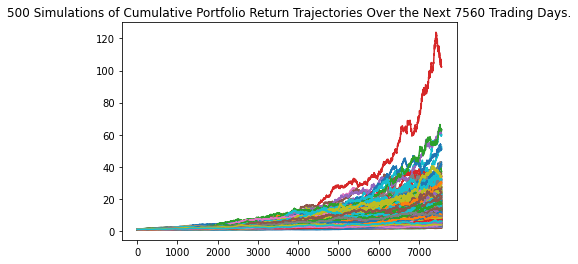

In [19]:
# Plot simulation outcomes
MC_line_plot = MC_thirty_yrs.plot_simulation()

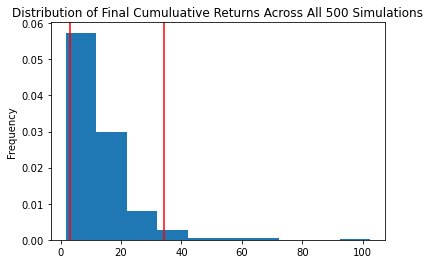

In [20]:
# Plot probability distribution and confidence intervals
MC_probability_dist = MC_thirty_yrs.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_thirty_summary = MC_thirty_yrs.summarize_cumulative_return()

# Print summary statistics
MC_thirty_summary

count           500.000000
mean             12.756757
std               9.747599
min               1.700640
25%               6.312132
50%              10.353920
75%              16.272589
max             102.450308
95% CI Lower      2.993951
95% CI Upper     34.261213
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_thirty_summary['95% CI Lower'] * initial_investment,2) 
ci_upper = round(MC_thirty_summary['95% CI Upper'] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59879.02 and $685224.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_thirty_summary['95% CI Lower'] * initial_investment,2)
ci_upper = round(MC_thirty_summary['95% CI Upper'] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89818.53 and $1027836.39


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992827,1.010761,1.016430,0.994520,0.997494,0.995134,0.989869,0.994562,0.993031,0.993622,...,0.996094,1.001902,0.996874,1.008664,1.005308,0.982751,1.004203,0.998213,0.999242,1.008029
2,0.991186,1.013472,1.019613,0.989626,1.006185,1.001891,0.997883,1.007128,0.983127,0.987861,...,0.988259,0.997549,0.994215,1.011156,1.009128,0.990742,1.007693,1.002926,0.999701,1.018296
3,1.005466,1.005037,1.021160,0.988565,1.006883,1.015624,0.993712,1.000785,0.977042,0.974479,...,0.993423,1.005275,0.988791,1.002057,0.999766,0.991681,1.009436,0.995784,1.004562,1.023263
4,1.008788,0.999647,1.012301,0.992149,1.003999,1.011224,0.997493,0.993921,0.979180,0.975495,...,0.998995,0.999721,0.993096,1.017927,1.002796,0.979262,1.004230,0.993095,1.009566,1.019718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.621639,1.520345,1.692469,0.861306,2.191175,1.307347,1.173371,0.867168,1.238894,1.236352,...,0.940481,2.033319,1.347250,1.270566,1.129853,2.178264,1.195064,1.020773,1.567654,1.628417
1257,1.620758,1.544979,1.672922,0.859504,2.241847,1.284538,1.171014,0.863859,1.229988,1.243344,...,0.961603,2.012817,1.339292,1.281347,1.125012,2.191360,1.194640,1.023273,1.569519,1.632422
1258,1.632202,1.554581,1.671137,0.866471,2.230867,1.289240,1.188976,0.868027,1.219354,1.246559,...,0.970940,2.015047,1.351529,1.284408,1.120287,2.176195,1.186444,1.035938,1.575351,1.653006
1259,1.627886,1.563119,1.679364,0.872503,2.246107,1.301830,1.191981,0.867814,1.209821,1.253076,...,0.976769,2.010660,1.330158,1.285547,1.111889,2.182120,1.185790,1.026137,1.569168,1.657448


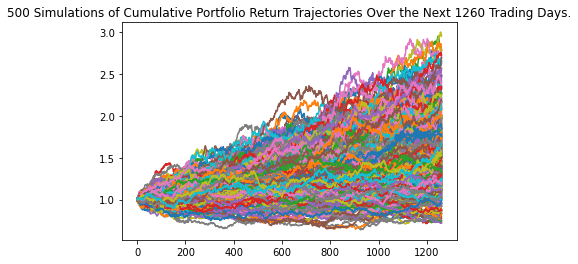

In [26]:
# Plot simulation outcomes
MC_five_line = MC_five_yrs.plot_simulation()

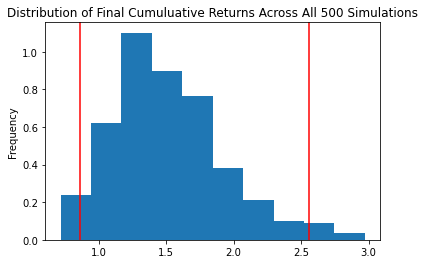

In [27]:
# Plot probability distribution and confidence intervals
MC_five_dist = MC_five_yrs.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_five_summary = MC_five_yrs.summarize_cumulative_return()

# Print summary statistics
MC_five_summary

count           500.000000
mean              1.517989
std               0.411948
min               0.718616
25%               1.220450
50%               1.465819
75%               1.754473
max               2.971628
95% CI Lower      0.861912
95% CI Upper      2.558945
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(initial_investment * MC_five_summary['95% CI Lower'],2)
ci_upper_five = round(initial_investment * MC_five_summary['95% CI Upper'],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17238.23 and $51178.91


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994083,0.998431,1.001183,0.994067,1.004620,0.999469,0.996001,1.004674,0.997384,0.998235,...,1.005892,0.995474,0.994193,1.002139,0.997203,1.012094,0.998081,1.000176,1.001114,1.003743
2,0.995936,1.003597,1.001922,0.995057,1.004117,1.003226,1.000761,1.005632,0.998952,1.003200,...,1.005332,0.995774,0.990980,0.993128,0.996603,1.013909,0.994588,1.000035,0.999567,1.004972
3,0.993524,1.002438,1.006327,1.003143,1.005999,1.007111,1.001073,1.004714,0.994529,1.007183,...,1.005971,1.001298,0.989824,0.997669,1.005560,1.008312,1.000627,0.993532,0.997468,1.000963
4,0.992061,0.998790,1.007516,0.999508,0.993613,1.006281,1.000383,1.001215,0.992992,1.012153,...,1.010193,1.000196,0.989492,0.997418,1.005530,1.000574,1.003120,0.998748,0.997592,0.993188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.659623,1.200990,1.962275,1.696779,1.058123,2.010849,2.376577,1.371761,2.541181,2.103657,...,2.094583,2.047979,1.898360,1.894715,1.827765,2.134757,1.826016,1.392044,1.935977,1.832223
2517,1.663806,1.201806,1.959054,1.706607,1.064611,2.006140,2.406698,1.367285,2.547976,2.098860,...,2.087242,2.042354,1.890972,1.884962,1.822469,2.148366,1.822430,1.382330,1.920894,1.844479
2518,1.655974,1.212524,1.948637,1.717638,1.057543,1.998237,2.393042,1.348736,2.534712,2.093965,...,2.089656,2.039051,1.895004,1.889827,1.826857,2.138564,1.829351,1.395421,1.922360,1.844805
2519,1.651219,1.204454,1.930490,1.732772,1.058814,1.998106,2.400882,1.343991,2.531929,2.092368,...,2.079462,2.036566,1.885822,1.893214,1.823293,2.150383,1.823441,1.383575,1.930277,1.865185


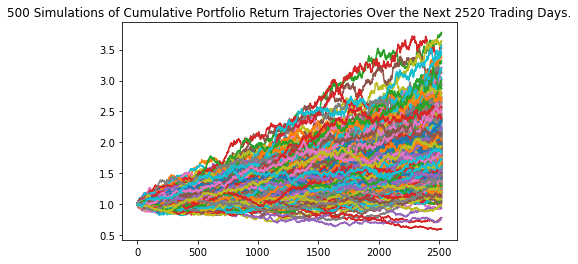

In [32]:
# Plot simulation outcomes
MC_ten_line = MC_ten_yrs.plot_simulation()

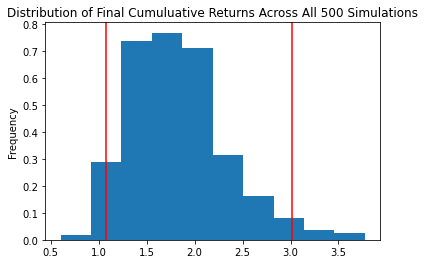

In [33]:
# Plot probability distribution and confidence intervals
MC_ten_dist = MC_ten_yrs.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_summary = MC_ten_yrs.summarize_cumulative_return()
# Print summary statistics
MC_ten_summary

count           500.000000
mean              1.830139
std               0.508811
min               0.602607
25%               1.455982
50%               1.780789
75%               2.111941
max               3.775055
95% CI Lower      1.074000
95% CI Upper      3.019942
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_ten_summary['95% CI Lower'] * initial_investment,2)
ci_upper_ten = round(MC_ten_summary['95% CI Upper'] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21480.0 and $60398.83
